<img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">
<center>
    <h1> ILI285/INF285 Computación Científica </h1>
    <h1> Tarea N°1: Introducción a Jupyter Notebook </h1>
    <h3> [S]cientific [C]omputing [T]eam 2018</h3>
</center>

<p>
<center>_Marzo 2018_ </center>
</p>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import time

## Introducción

El objetivo de este laboratorio es familiarizarse con la herramienta Jupyter notebook, esta es una plataforma web que permite crear y compartir documentos que contienen código fuente, ecuaciones, visualizaciones y texto explicativo.
El lenguaje de programación a utilizar será Python, es una buena alternativa debido a que Python posee muchos modulos especializados en algebra lineal, metodos numericos, vizualizcción de datos,etc. 

## Pregunta 1 [20 Pts]

1) Una farmacia vende 10 frascos de vitamina A, 5 frascos de vitamina C y 25 frascos de vitamina D, todo por un valor de 355 pesos. Además, vende 20 frascos de vitamina A, 10 de vitamina C y 10 de vitamina D por un total de 310 pesos. Por otra parte vende 12 frascos de vitamina A, 4 de vitamina C y 15 de vitamina D por un total de 266 pesos. Encuentra el costo correspondiente a cada frasco de las vitaminas A, C y D.

In [2]:
a = np.array([[10,5,25],[20,10,10],[12,4,15]])
b = np.array([355,310,266])
x = linalg.solve(a,b)
print("Costo Vitamina A: %s" % (int(x[0])))
print("Costo Vitamina C: %s" % (int(x[1])))
print("Costo Vitamina D: %s" % (int(x[2])))

Costo Vitamina A: 7
Costo Vitamina C: 5
Costo Vitamina D: 10


2) Se tiene el siguiente sistema de ecuaciones:

\begin{align}
6x_1 - 5x_2 - 7x_3 - 4x_4 + 3x_5 + 8x_6 &= -44 \\
-7x_1 + 4x_2 + 7x_3 + 1x_4 - 3x_5 + 8x_6 &= 8 \\
6x_1 - 3x_2 + 7x_3 - 6x_4 + 5x_5 - 6x_6 &= 104 \\
8x_1 - 5x_2 + 7x_3 + x_4 - 6x_5 + 4x_6 &= 44\\
2x_1 + 8x_2 + 6x_3 + 2x_4 - 8x_5 + 3x_6 &= -47\\
-2x_1 + 4x_2 + 5x_3 + 7x_4 - 6x_5 - 5x_6 &= 6
\end{align}

Represente ambos problemas como un sistema matricial, es decir de la forma $A\mathbf{x}$ = $ \mathbf{b}$ , luego encuentre los valores del vector $\mathbf{x}$: 
* Usando la función *solve* de SciPy [[1]](#bib).
* Haciendo uso de la inversa de A y el vector $\mathbf{b}$. ($\mathbf{x} = A^{-1} \mathbf{b}$).

Además, calcule el tiempo que demoran los dos métodos anteriores.

In [3]:
%timeit
a = np.array([[6,-5,-7,-4,3,8],[-7,4,7,1,-3,8],[6,-3,7,-6,5,-6],[8,-5,7,1,-6,4],[2,8,6,2,-8,3],[-2,4,5,7,-6,-5]])
b = np.array([-44,8,104,44,-47,6])
x = linalg.solve(a,b)
x

array([-2., -7.,  8., -1.,  3., -3.])

In [4]:
%timeit
a = np.array([[6,-5,-7,-4,3,8],[-7,4,7,1,-3,8],[6,-3,7,-6,5,-6],[8,-5,7,1,-6,4],[2,8,6,2,-8,3],[-2,4,5,7,-6,-5]])
b = np.array([-44,8,104,44,-47,6])
linalg.inv(a).dot(b)

array([-2., -7.,  8., -1.,  3., -3.])

## Pregunta 2 [30 Pts]

La matriz de Hilbert es una matriz cuadrada que cuenta con la siguiente forma:

$$
H_{i,j} = \frac{1}{i+j-1}, i,j = 1\ldots n
$$

Construya la función *Hilbert(n)*, mediante la siguiente estructura:

```python
'''
n - (integer) Matrix size
H - (2D-array) Hilbert matrix
x - (1D-array) Random vector x
b - (1D-array) Vector result of Ax
'''
```
```python     
def Hilbert(n):
    ...
    return H, x, b
```

Esta función deberá retornar matrices de Hilbert, vectores $\mathbf{x}$ de forma aleatoria (recuerde elegir una semilla para poder reproducir sus experimentos) y un vector $\mathbf{b}$ construido a partir de $A\mathbf{x} = \mathbf{b}$. Se deberá mostrar a través de un gráfico los tiempos de resolución de cada método (usando la función *solve* de SciPy y resolviendo directamente $\mathbf{x} = A^{-1} \mathbf{b}$) para matrices de tamaño 10, 100, 300, 500, 700, 1000, 1300. Calcule el error de sus dos métodos con respecto al vector $\mathbf{x}$ creado anteriormente y grafique el tamaño de la matriz vs el error. Concluya.

Para los gráficos de tiempo, ocupe la función *loglog*, y para los de error *semilogy* [[2]](#bib).

In [93]:
from scipy.linalg import hilbert
from sklearn.metrics import mean_squared_error as mse
import random
import time

def Hilbert(n):
    np.random.seed(44)
    H = [[0 for x in range(n)] for y in range(n)]
    x = np.random.rand(n)
    for i in range(n):
        for j in range(n):
            H[i][j] = 1/(i+j+1)      #se coloco un +1 al incrementar en +1 el i y el j para solucionar el problema de indices
    x = np.random.rand(n)
    b = np.dot(H,x)
    return H,x,b


def calcularX(metodo):
    the_list = [10,100, 300, 500, 700, 1000, 1300]
    time_list = []
    error_list = []
    for i in the_list:
        start = time.time()
        H,x,b = Hilbert(i)
        if(metodo == 1):
            new_x = linalg.solve(H,b)
        elif(metodo == 2):
            new_x = linalg.inv(H).dot(b)
        end = time.time()
        time_list.append(end-start)
        error_list.append(mse(x,new_x))
    return time_list, error_list

        
tiempo1,error1 = calcularX(1)
tiempo2,error2 = calcularX(2)

/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.279889739544296e-21 / 1.1102230246251565e-16
  RuntimeWarning)
/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.739638459522049e-21 / 1.1102230246251565e-16
  RuntimeWarning)
/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.894135436986915e-21 / 1.1102230246251565e-16
  RuntimeWarning)
/home/gabo/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy

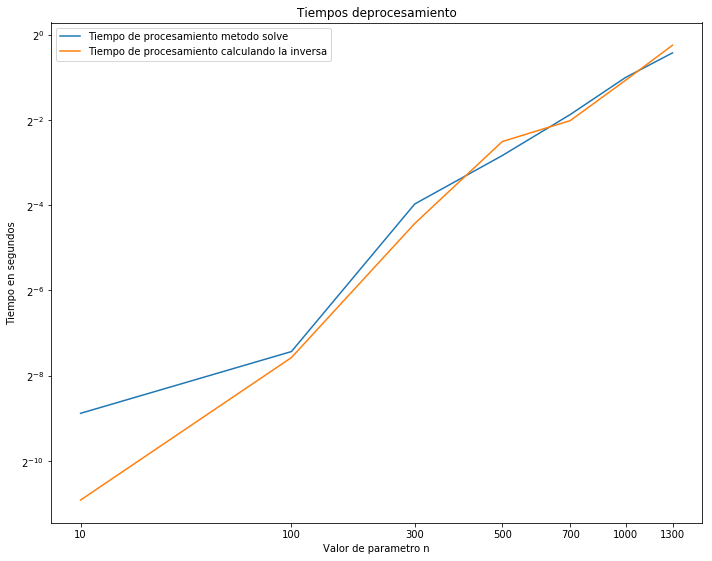

In [99]:
Cs = [10,100, 300, 500, 700, 1000, 1300]
pasos = [1,2,3,4,5,6,7]

plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.loglog(pasos, tiempo1, label='Tiempo de procesamiento metodo solve',basex = 2,basey=2)
plot.loglog(pasos, tiempo2, label='Tiempo de procesamiento calculando la inversa',basex = 2,basey=2)
plt.legend()
plt.title('Tiempos deprocesamiento')
plt.xlabel('Valor de parametro n')
plt.ylabel('Tiempo en segundos')
plt.xticks(pasos, Cs)
plt.tight_layout()
plt.show()

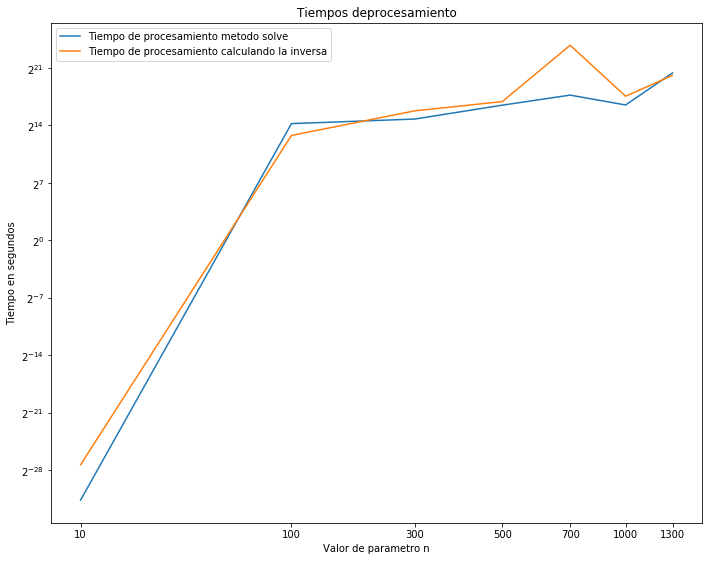

In [101]:
Cs = [10,100, 300, 500, 700, 1000, 1300]
pasos = [1,2,3,4,5,6,7]

plt.figure(figsize=(10,15))
plot = plt.subplot(2,1,1)
plot.loglog(pasos, error1, label='Tiempo de procesamiento metodo solve',basex = 2,basey=2)
plot.loglog(pasos, error2, label='Tiempo de procesamiento calculando la inversa',basex = 2,basey=2)
plt.legend()
plt.title('Tiempos deprocesamiento')
plt.xlabel('Valor de parametro n')
plt.ylabel('Tiempo en segundos')
plt.xticks(pasos, Cs)
plt.tight_layout()
plt.show()

## Pregunta 3 [40 Pts]

Usando la función *Hilbert(n)* creada anteriormente, repita 50 veces cada método con matrices de tamaño 10, 100, 300, 500, 700, 1000, 1300, y guarde sus tiempos de ejecución. Con esta data, realice un gráfico de *boxplot* [[3]](#bib) de cada método (en total serán 14 *boxplots*), indicando claramente a que método corresponde cada boxplot. Una con una línea las medias de cada método en los boxplots mostrados y concluya.

# Instrucciones:

* La estructura del laboratorio es la siguiente:
     1. Título, nombre de estudiante, email y rol.
     2. Introducción.
     3. Desarrollo y análisis de resultados.
     4. Conclusiones.
     5. Referencias.
* El laboratorio debe ser realizado en `Jupyter Notebook` (`Python3`).
* Se evaluará la correcta utilización de librerias `NumPy`, `SciPy`, `SymPy`, `Matplotlib` y `ipywidgets`, así como la correcta implementación de algoritmos vectorizados.
* El archivo de entrega debe denominarse Tarea1-rol.tar.gz y debe contener un directorio con todos los archivos necesarios para ejecutar el notebook, junto con un archivo README indicando explícitamente las librerías o módulos utilizados, nombre y rol del estudiante.
* El descuento por día de atraso será de $30$ puntos, con un máximo de 1 día de atraso. No se recibirán entregas después de este día.
* El trabajo es personal, no se permite compartir código ni utilizar código de otros, aunque sí se sugiere discutir aspectos generales con sus compañeros.
* En caso de sospecha de no cumplimiento de estas instrucciones, se solicitará al involucrado o la involucrada a aclarar la situación. Dependiendo de la justificación se decidirá su calificación, la cual podrá o no ser penalizada.
* El no seguir estas instrucciones, implica descuentos en su nota obtenida.

<a id='bib'></a>
## Referencias

* 1.- <a href=https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.solve.html>[1] Documentación del método *solve* de  SciPy </a>
* 2.- <a href=https://matplotlib.org/examples/pylab_examples/log_demo.html>[2] Gráficos con *semilogy* y *loglog* </a>
* 3.- <a href=https://stackoverflow.com/questions/16592222/matplotlib-group-boxplots>[3] Crear grupos de boxplots </a>